__Reference__

This notebook referenced the following Kaggle Kernels:
-  [Nadin Tamer, Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)
-  [Omar El Gabry, A Journey through Titanic](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)
-  [Anisotropic, Introduction to Ensembling/Stacking in Python](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)
- [Sina, Titanic best working Classifier](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)

## Introduction to Machine Learning through Titanic Project

###  Critical Steps
1. Importing & Exploring Necessary Libraries
2. Read in Data
3. Feature Exploration
4. Data Manipulation
5. Running Machine Learning Algorithms
6. Creating Submission File to Kaggle

# 1. Import Libraries

In [1]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 2. Read in Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 3. Feature Exploration

In this step, we will get a basic sense of the data and visualize the features to figure out which ones are relevant for the analysis.

In [3]:
# A basic look at the training data
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6,C2,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


In [4]:
# Summary of the training data
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bishop, Mrs. Dickinson H (Helen Walton)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# Get a clearer understanding of data types and missing values
train.info()
print('***************************************************')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
***************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         4

## 3.1 Pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


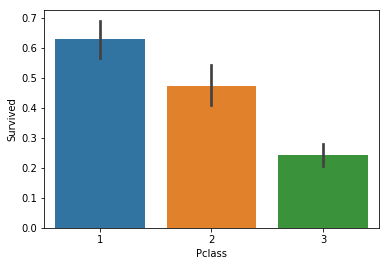

In [6]:
# Explore if survival rate depends on passenger class
sns.barplot(x = "Pclass", y = "Survived", data = train)
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean()

There seems to be a significant difference in survival rate for passengers in different classes. This feature should go into the model.

## 3.2 Sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


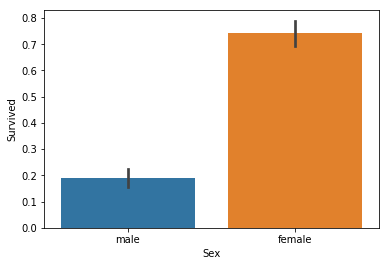

In [7]:
# Explore if survival rate depends on passenger gender
sns.barplot(x = "Sex", y = "Survived", data = train)
train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

Sex should definitely go into the model as well.

## 3.3 Age 

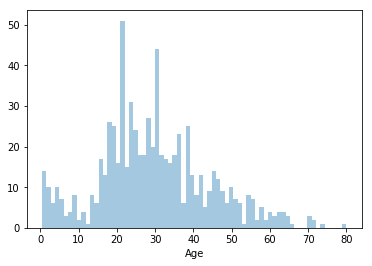

In [8]:
# Age is a continuous variable with 20% of the data missing. 
# We will first look at the distribution
sns.distplot(train["Age"].dropna(), bins = 70, kde = False)

- Age is not normally distributed so we cannot simply generate random numbers following a normal distribution to fill in the missing numbers. 
- Instead of treating age as a continuous variable, it might be better to categorize age intervals since one year difference in age would probably not determine if the person survive.
- In the next section, we will come up ways to fill in the missing value and categorize age.

## 3.3 SibSp

   Survived Mean  Count       STD
0       0.345395    608  0.475888
1       0.535885    209  0.499908
2       0.464286     28  0.507875
3       0.250000     16  0.447214
4       0.166667     18  0.383482
5       0.000000      5  0.000000
6       0.000000      7  0.000000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


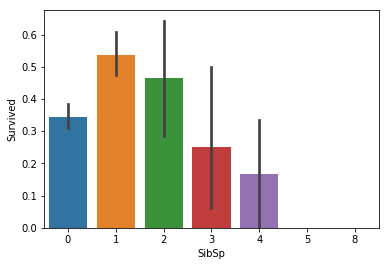

In [9]:
# Explore if survival rate depends on the number of siblings/spouses abroad the Titanic
sns.barplot(x = "SibSp", y = "Survived", data = train)
sibsp = pd.DataFrame()
sibsp["Survived Mean"] = train[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean()["Survived"]
sibsp["Count"] = train[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).count()["Survived"]
sibsp["STD"] = train[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).std()["Survived"]
print(sibsp)
train[(train["SibSp"] == 5)|(train["SibSp"] == 8)]

- In the next step, we will group "SibSp" into [0, 1, 2 or more]
- It is surprising that none of the members in the two families with 5 and 8 SibSp survived. Looking at the available "Age" data points, it seems that most of them are kids. It would be a good idea to fill in the rest ages as "teenagers" or "kids". However, there are only 7 records that needs to be filled in in this way so in this analysis, we will not treat them differently. 

## 3.4 Parch

   Survived Mean  Count       STD
0       0.343658    678  0.475279
1       0.550847    118  0.499529
2       0.500000     80  0.503155
3       0.600000      5  0.547723
4       0.000000      4  0.000000
5       0.200000      5  0.447214
6       0.000000      1       NaN


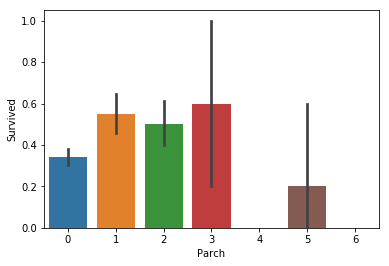

In [10]:
# Explore if survival rate depends on the number of parents/children abroad the Titanic
sns.barplot(x = "Parch", y = "Survived", data = train)
sibsp["Survived Mean"] = train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean()["Survived"]
sibsp["Count"] = train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).count()["Survived"]
sibsp["STD"] = train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).std()["Survived"]
print(sibsp)

- In the next step, we will group "Parch" into [0, 1, 2 or more]

## 3.5 Fare

          Fare
Survived      
0          549
1          342


,Fare
Survived,
0,10.5
1,26.0


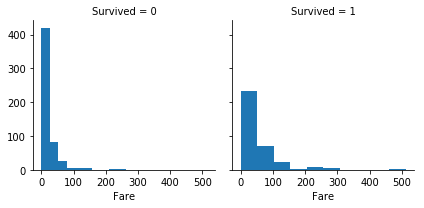

In [11]:
# See the distribution of Fare
#sns.distplot(train["Fare"][train["Pclass"]==1].dropna(), bins = 10, kde = False)
print(train[["Fare", "Survived"]].dropna().groupby(["Survived"]).count())
fare_hist = sns.FacetGrid(train, col="Survived")
fare_hist = fare_hist.map(plt.hist, "Fare")

train[["Fare", "Survived"]].dropna().groupby(["Survived"]).median()

- The outputs above indicate that the distribution of fare for the group who survived and the group who did not is different. So we will include fare in the model.
- We will also categorize fare.

## 3.6 Cabin

In [12]:
# There are many missing values in this colomn
(train["Survived"][train["Cabin"].isnull()].count())/(train["Cabin"].count())

3.3676470588235294

- Since there are much more missing values than available values, we will leave this variable out from the model.

## 3.7 Embarked

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


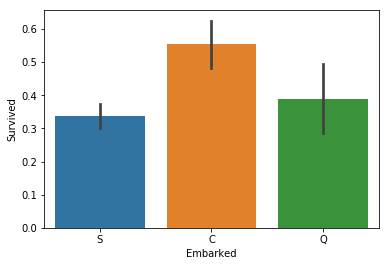

In [13]:
# Explore if survival rate depends on the port passenger embarked
sns.barplot(x = "Embarked", y = "Survived", data = train)
train[["Survived", "Embarked"]].groupby(["Embarked"]).mean()

- We will keep this variable in our model.

## Insights from Feature Exploration & Next Steps
- Some variables may not have valuable information and can be dropped from the dataset.
- Missing values in both the training dataset and testing dataset should be addressed.
- Continuous variables should be categorized.

# 4. Data Manipulation

## 4.1 Dropping Unnecessary Variables

From the outputs above, we get a basic sense of the variables and it is intuitive that "PassengerId", "Name"and "Ticket" are not likely to be valuable for the analysis. Therefore, we will drop these variables from both the training and testing dataset. 

From the summary statistics, we also realize that the column "cabin" has too many missing values to draw information from. We will also exclude this column from the datasets.

In [14]:
PassengerId = test['PassengerId']
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
test = test.drop(["PassengerId","Name", "Ticket", "Cabin"], axis = 1)

In [15]:
#train.info()
#print('***************************************************')
#test.info()

## 4.2 Dealing with Missing Values

There are two variabels with missing values in the training dataset: "Age" and "Embarked"

 ## *4.2.1 Embarked -- categorical data* 
 
 ### It's common to replace missing values of a categorical variable with mode. We will find the count for each unique values and replace is with the most appeared value.

In [16]:
print(train["Embarked"].unique())
print(train.groupby(["Embarked"])["Survived"].count().reset_index())
train["Embarked"] = train["Embarked"].fillna("S")
train.groupby(["Embarked"])["Survived"].count().reset_index()

['S' 'C' 'Q' nan]
  Embarked  Survived
0        C       168
1        Q        77
2        S       644


,Embarked,Survived
0,C,168
1,Q,77
2,S,646


## *4.2.2 Age*

### About 20% of the "Age" column is missing. As inspied by *A Journey through Titanic*, we will replace missing values with random numbers between (mean - std) and (mean + std)

In [17]:
# Calculate mean and standard deviation of "Age" column
train_mean = train["Age"].mean()
train_std = train["Age"].std()
test_mean = test["Age"].mean()
test_std = test["Age"].std()

# Count missing values
count_na_train = train["Age"].isnull().sum()
count_na_test = test["Age"].isnull().sum()

# generate random numbers
np.random.seed(66)
train_rand = np.random.randint(train_mean - train_std, train_mean + train_std, size = count_na_train)
test_rand = np.random.randint(test_mean - test_std, test_mean + test_std, size = count_na_test)

# Fill missing values with random numbers
train["Age"][np.isnan(train["Age"])] = train_rand
test["Age"][np.isnan(test["Age"])] = test_rand

# Convert into int
train["Age"] = train["Age"].astype(int)
test["Age"] = test["Age"].astype(int)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## *4.2.3 Fare*

### There is one missing value for fare in the test data. We will simply replace it with the median

In [18]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [19]:
# Confirm that all missing values are taken care of
#train.info()
#print('***************************************************')
#test.info()

## 4.3 Categorize Numeric Values

## 4.3.1 Age

In [20]:
# Map Age to categorical groups
train.loc[train["Age"] <= 3, "age_c"] = "Infant & Toddler"
train.loc[(train["Age"] > 3)&(train["Age"] <= 12), "age_c"] = "Young Teenage"
train.loc[(train["Age"] <= 18)&(train["Age"] > 12), "age_c"] = "Teenager"
train.loc[(train["Age"] > 18)&(train["Age"] <= 25), "age_c"] = "Young Adult"
train.loc[(train["Age"] <= 50)&(train["Age"] > 25), "age_c"] = "Adult"
train.loc[(train["Age"] > 50)&(train["Age"] <= 65), "age_c"] = "Middle-aged"
train.loc[(train["Age"] > 65), "age_c"] = "Senior"

test.loc[test["Age"] <= 3, "age_c"] = "Infant & Toddler"
test.loc[(test["Age"] > 3)&(test["Age"] <= 12), "age_c"] = "Young Teenage"
test.loc[(test["Age"] <= 18)&(test["Age"] > 12), "age_c"] = "Teenager"
test.loc[(test["Age"] > 18)&(test["Age"] <= 25), "age_c"] = "Young Adult"
test.loc[(test["Age"] <= 50)&(test["Age"] > 25), "age_c"] = "Adult"
test.loc[(test["Age"] > 50)&(test["Age"] <= 65), "age_c"] = "Middle-aged"
test.loc[(test["Age"] > 65), "age_c"] = "Senior"

train[["age_c","Survived"]].groupby(["age_c"]).mean()

,Survived
age_c,
Adult,0.391209
Infant & Toddler,0.666667
Middle-aged,0.375000
Senior,0.125000
Teenager,0.400000
Young Adult,0.307692
Young Teenage,0.512821


In [21]:
# set up two new dataframes for the final model
m_train = train
m_test = test

#m_train.info()
#print('***************************************************')
#m_test.info()

In [22]:
# Generate Dummy Variable for Age
# Dropped the first one to avoid multicollinearity
age_dummy_train = pd.get_dummies(train["age_c"], drop_first = True)
age_dummy_test = pd.get_dummies(test["age_c"], drop_first = True)

# Concatenate Age dummy with the original training dataset
m_train = pd.concat([m_train, age_dummy_train], axis = 1)
m_test = pd.concat([m_test, age_dummy_test], axis = 1)

# Drop original Age and age_c
m_train = m_train.drop(["age_c", "Age"], axis = 1)
m_test = m_test.drop(["age_c", "Age"], axis = 1)

m_train.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage
64,0,1,male,0,0,27.7208,C,0,0,0,0,0,0
141,1,3,female,0,0,7.7500,S,0,0,0,0,1,0
488,0,3,male,0,0,8.0500,S,0,0,0,0,0,0
336,0,1,male,1,0,66.6000,S,0,0,0,0,0,0
127,1,3,male,0,0,7.1417,S,0,0,0,0,1,0


## 4.3.2 SibSp

Categorize into 0,1,2 or more

In [23]:
# Map SibSp into categories
train.loc[train["SibSp"] == 0, "sib_c"] = "None"
train.loc[train["SibSp"] == 1, "sib_c"] = "One"
train.loc[train["SibSp"] >1 , "sib_c"] = "2 or More"

test.loc[test["SibSp"] == 0, "sib_c"] = "None"
test.loc[test["SibSp"] == 1, "sib_c"] = "One"
test.loc[test["SibSp"] >1 , "sib_c"] = "2 or More"

# Generate Dummy Variable
sib_dummy_train = pd.get_dummies(train["sib_c"], drop_first = True)
sib_dummy_test = pd.get_dummies(test["sib_c"], drop_first = True)


# Append sib_dummy to m-train
m_train = pd.concat([m_train, sib_dummy_train], axis = 1)
m_train = m_train.drop(["SibSp"], axis = 1)

m_test = pd.concat([m_test, sib_dummy_test], axis = 1)
m_test = m_test.drop(["SibSp"], axis = 1)

m_train.sample(5)

,Survived,Pclass,Sex,Parch,Fare,Embarked,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage,None,One
24,0,3,female,1,21.0750,S,0,0,0,0,0,1,0,0
426,1,2,female,0,26.0000,S,0,0,0,0,0,0,0,1
849,1,1,female,0,89.1042,C,0,0,0,0,1,0,0,1
302,0,3,male,0,0.0000,S,0,0,0,0,1,0,1,0
474,0,3,female,0,9.8375,S,0,0,0,0,1,0,1,0


## 4.3.3 Parch

Categorize into 0,1, 2 and more

In [24]:
# Map Parch into categories
train.loc[train["Parch"] == 0, "pc_c"] = "None_pc"
train.loc[train["Parch"] == 1, "pc_c"] = "One_pc"
train.loc[train["Parch"] >1 , "pc_c"] = "2 or More_pc"

test.loc[test["Parch"] == 0, "pc_c"] = "None_pc"
test.loc[test["Parch"] == 1, "pc_c"] = "One_pc"
test.loc[test["Parch"] >1 , "pc_c"] = "2 or More_pc"

# Generate Dummy Variable
pc_dummy_train = pd.get_dummies(train["pc_c"], drop_first = True)
pc_dummy_test = pd.get_dummies(test["pc_c"], drop_first = True)


# Append sib_dummy to m-train/m-test
m_train = pd.concat([m_train, pc_dummy_train], axis = 1)
m_train = m_train.drop(["Parch"], axis = 1)

m_test = pd.concat([m_test, pc_dummy_test], axis = 1)
m_test = m_test.drop(["Parch"], axis = 1)

m_train.sample(5)

,Survived,Pclass,Sex,Fare,Embarked,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage,None,One,None_pc,One_pc
766,0,1,male,39.6000,C,0,0,0,0,0,0,1,0,1,0
889,1,1,male,30.0000,C,0,0,0,0,0,0,1,0,1,0
752,0,3,male,9.5000,S,0,0,0,0,0,0,1,0,1,0
65,1,3,male,15.2458,C,0,0,0,0,0,0,0,1,0,1
103,0,3,male,8.6542,S,0,0,0,0,0,0,1,0,1,0


## 4.3.4 Fare

In [25]:
# Map fare values into categories
train["fare_c"] = pd.qcut(train["Fare"], 4, labels = ["fare25%", "fare50%", "fare75%","fare100%"])
test["fare_c"] = pd.qcut(test["Fare"], 4, labels = ["fare25%", "fare50%", "fare75%","fare100%"])

# Generate dummy variables for both train and test
fare_dummy_train = pd.get_dummies(train["fare_c"], drop_first = True)
fare_dummy_test = pd.get_dummies(test["fare_c"], drop_first = True)

# Append dummy variables to the original data frames
m_train = pd.concat([m_train, fare_dummy_train], axis = 1)
m_train = m_train.drop(["Fare"], axis = 1)

m_test = pd.concat([m_test, fare_dummy_test], axis = 1)
m_test = m_test.drop(["Fare"], axis = 1)

m_train.sample(5)

,Survived,Pclass,Sex,Embarked,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage,None,One,None_pc,One_pc,fare50%,fare75%,fare100%
139,0,1,male,C,0,0,0,0,1,0,1,0,1,0,0,0,1
140,0,3,female,C,0,0,0,0,0,0,1,0,0,0,0,1,0
832,0,3,male,C,0,0,0,0,0,0,1,0,1,0,0,0,0
305,1,1,male,S,1,0,0,0,0,0,0,1,0,0,0,0,1
747,1,2,female,S,0,0,0,0,0,0,1,0,1,0,1,0,0


## 4.4 Assign numerical values to categorical variables

## 4.4.1 Sex

In [26]:
# Generate dummy variables for both train and test
sex_dummy_train = pd.get_dummies(train["Sex"], drop_first = True)
sex_dummy_test = pd.get_dummies(test["Sex"], drop_first = True)

# Append dummy variables to the original data frames
m_train = pd.concat([m_train, sex_dummy_train], axis = 1)
m_train = m_train.drop(["Sex"], axis = 1)

m_test = pd.concat([m_test, sex_dummy_test], axis = 1)
m_test = m_test.drop(["Sex"], axis = 1)

m_train.sample(5)

,Survived,Pclass,Embarked,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage,None,One,None_pc,One_pc,fare50%,fare75%,fare100%,male
49,0,3,S,0,0,0,1,0,0,0,1,1,0,0,1,0,0
630,1,1,S,0,0,1,0,0,0,1,0,1,0,0,1,0,1
768,0,3,Q,0,0,0,0,1,0,0,1,1,0,0,1,0,1
724,1,1,S,0,0,0,0,0,0,0,1,1,0,0,0,1,1
567,0,3,S,0,0,0,0,0,0,1,0,0,0,0,1,0,0


## 4.4.2 Embarked

In [27]:
# Generate dummy variables for both train and test
emk_dummy_train = pd.get_dummies(train["Embarked"], drop_first = True)
emk_dummy_test = pd.get_dummies(test["Embarked"], drop_first = True)

# Append dummy variables to the original data frames
m_train = pd.concat([m_train, emk_dummy_train], axis = 1)
m_train = m_train.drop(["Embarked"], axis = 1)

m_test = pd.concat([m_test, emk_dummy_test], axis = 1)
m_test = m_test.drop(["Embarked"], axis = 1)

m_train.sample(5)

,Survived,Pclass,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage,None,One,None_pc,One_pc,fare50%,fare75%,fare100%,male,Q,S
197,0,3,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
732,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
650,0,3,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1
858,1,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
124,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1


## 4.4.3 Pclass

In [28]:
# Map Parch into categories
train.loc[train["Pclass"] == 1, "class_c"] = "class1"
train.loc[train["Pclass"] == 2, "class_c"] = "class2"
train.loc[train["Pclass"] == 3, "class_c"] = "class3"

test.loc[train["Pclass"] == 1, "class_c"] = "class1"
test.loc[train["Pclass"] == 2, "class_c"] = "class2"
test.loc[train["Pclass"] == 3, "class_c"] = "class3"

# Generate dummy variables for both train and test
class_dummy_train = pd.get_dummies(train["class_c"], drop_first = True)
class_dummy_test = pd.get_dummies(test["class_c"], drop_first = True)

# Append dummy variables to the original data frames
m_train = pd.concat([m_train, class_dummy_train], axis = 1)
m_train = m_train.drop(["Pclass"], axis = 1)

m_test = pd.concat([m_test, class_dummy_test], axis = 1)
m_test = m_test.drop(["Pclass"], axis = 1)

m_train.sample(5)

,Survived,Infant & Toddler,Middle-aged,Senior,Teenager,Young Adult,Young Teenage,None,One,None_pc,One_pc,fare50%,fare75%,fare100%,male,Q,S,class2,class3
849,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
241,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1
609,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
491,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
48,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1


In [29]:
# Check dataset status before modelling
train.info()
print('***************************************************')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
age_c       891 non-null object
sib_c       891 non-null object
pc_c        891 non-null object
fare_c      891 non-null category
class_c     891 non-null object
dtypes: category(1), float64(1), int64(5), object(6)
memory usage: 84.7+ KB
***************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
age_c       418 non-null ob

# 5. Running Machine Learning Algorithms

The datasets are finally ready for modeling!!!

We will explore the following models:
- Gaussian Naive Bayes
- Logistics Regression
- Support Vector Machine
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors

* Note that all parameters are set as default as of 1/10/2018; To be adjusted

In [30]:
# As inspired by Nadin, we will use 80% of the data for training,
# and the rest 20% to test the accuracy of the model

predictors = m_train.drop(["Survived"], axis = 1)
target = m_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [31]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
# y_pred = gaussian.predict(x_val)
acc_gaussian = gaussian.score(x_val, y_val)
acc_gaussian

0.7541899441340782

In [32]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#y_pred = logreg.predict(x_val)
acc_logreg = logreg.score(x_val, y_val)
acc_logreg

0.7932960893854749

In [33]:
# Support Vector Machine
svc = SVC()
svc.fit(x_train, y_train)
#y_pred = logreg.predict(x_val)
acc_svc = svc.score(x_val, y_val)
acc_svc

0.7877094972067039

In [34]:
# Decision Tree Classifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
#y_pred = decisiontree.predict(x_val)
acc_decisiontree = decisiontree.score(x_val, y_val)
acc_decisiontree

0.8491620111731844

In [35]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
#y_pred = randomforest.predict(x_val)
acc_randomforest = randomforest.score(x_val, y_val)
acc_randomforest

0.8268156424581006

In [36]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
#y_pred = knn.predict(x_val)
acc_knn = knn.score(x_val, y_val)
acc_knn

0.8156424581005587

Based on the outputs above, Decision Tree seems to work the best.

# 6. Create a Submission File


In [37]:
# Generate Predictions
prediction = decisiontree.predict(m_test)

submission_titanic = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': prediction })
submission_titanic.to_csv("submission_titanic.csv", index = False)
